In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Traindf=pd.read_excel('Flight_Train.xlsx')
Traindf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
Traindf.shape

(10683, 11)

In [4]:
Traindf.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

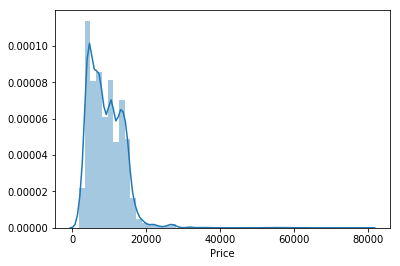

In [5]:
sns.distplot(Traindf['Price'])

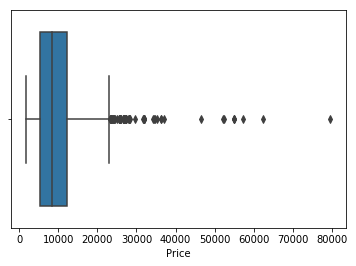

In [6]:
sns.boxplot(Traindf['Price'])

In [7]:
from scipy.stats import boxcox
Traindf['Price']=boxcox(Traindf['Price'],0)

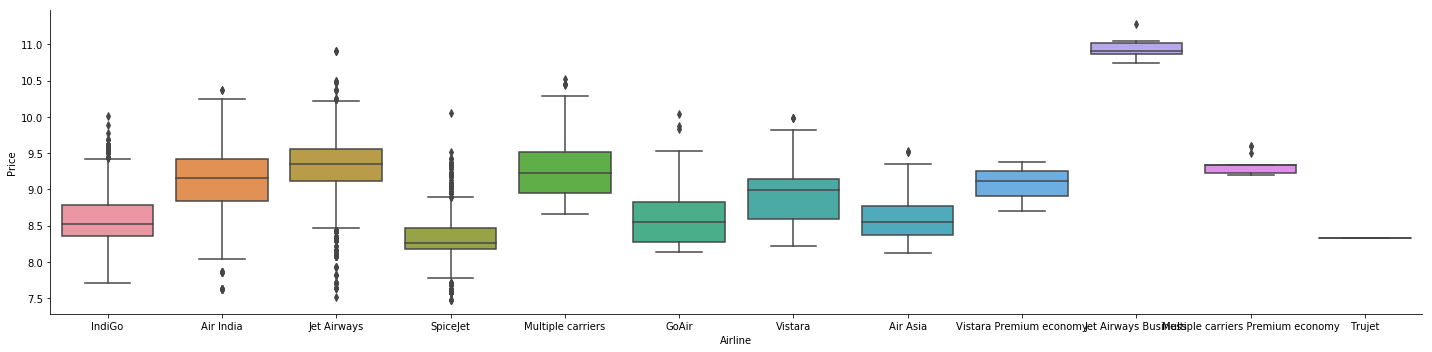

In [8]:
sns.catplot(x='Airline',y='Price',kind='box',data=Traindf,height=5,aspect=4)

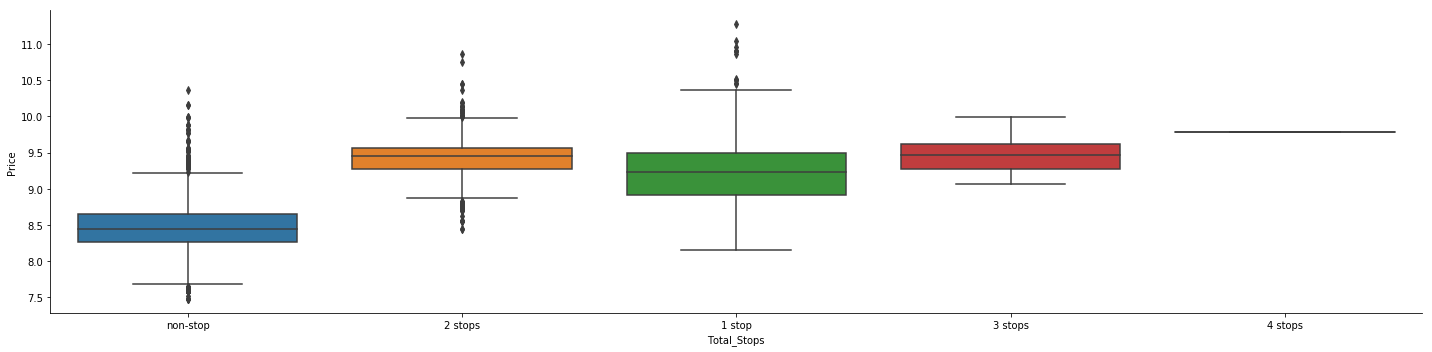

In [9]:
sns.catplot(x='Total_Stops',y='Price',kind='box',data=Traindf,height=5,aspect=4)

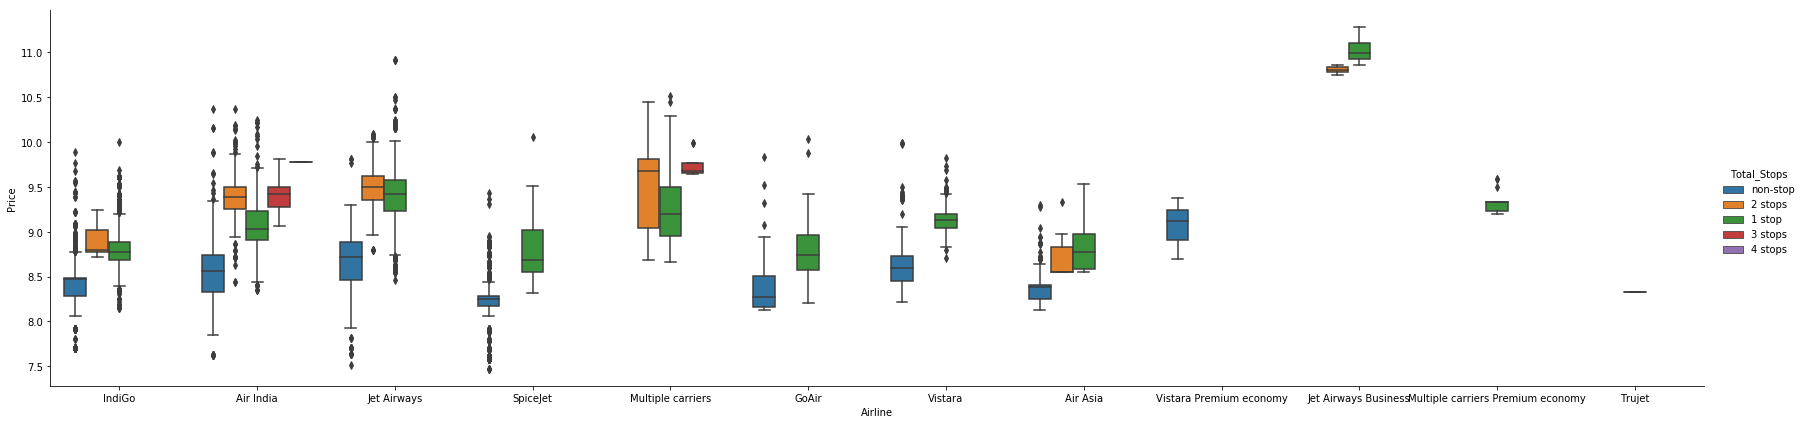

In [10]:
sns.catplot(x='Airline',y='Price',hue='Total_Stops',kind='box',data=Traindf,height=6,aspect=4)

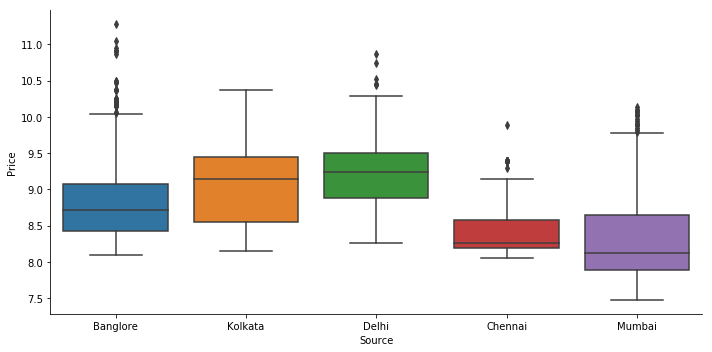

In [11]:
sns.catplot(x='Source',y='Price',kind='box',data=Traindf,height=5,aspect=2)

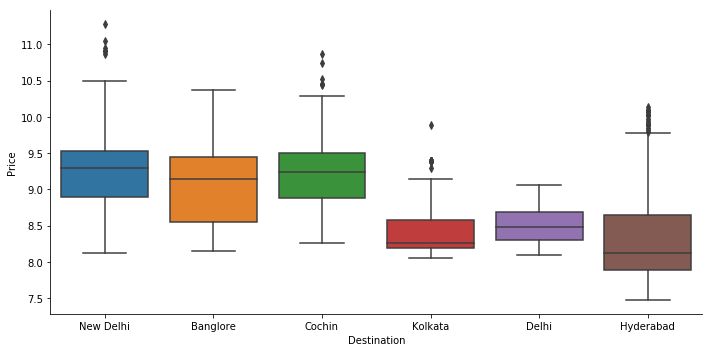

In [12]:
sns.catplot(x='Destination',y='Price',kind='box',data=Traindf,height=5,aspect=2)

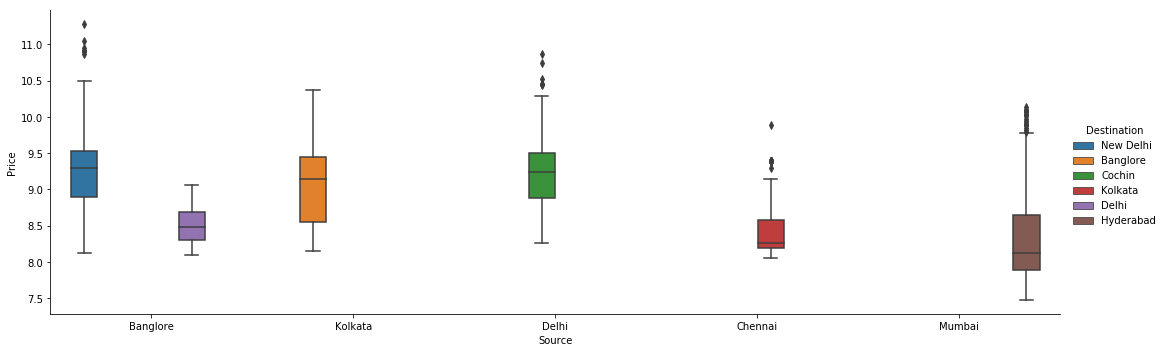

In [13]:
sns.catplot(x='Source',y='Price',hue='Destination',kind='box',data=Traindf,height=5,aspect=3)

In [14]:
Testdf=pd.read_excel('Flight_Test.xlsx')
Testdf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [15]:
Testdf.shape

(2671, 10)

In [16]:
Traindf['Data']='Train'
Testdf['Data']='Test'
Testdf['Price']=0

In [17]:
df=pd.concat([Traindf,Testdf])

In [18]:
df.head()

,Additional_Info,Airline,Arrival_Time,Data,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,Train,24/03/2019,22:20,New Delhi,2h 50m,8.267962,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,Train,1/05/2019,05:50,Banglore,7h 25m,8.944028,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,Train,9/06/2019,09:25,Cochin,19h,9.538348,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,Train,12/05/2019,18:05,Banglore,5h 25m,8.735204,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,Train,01/03/2019,16:50,New Delhi,4h 45m,9.495670,BLR → NAG → DEL,Banglore,1 stop


In [19]:
df.shape

(13354, 12)

In [20]:
df.columns

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Data', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Total_Stops'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
Additional_Info    13354 non-null object
Airline            13354 non-null object
Arrival_Time       13354 non-null object
Data               13354 non-null object
Date_of_Journey    13354 non-null object
Dep_Time           13354 non-null object
Destination        13354 non-null object
Duration           13354 non-null object
Price              13354 non-null float64
Route              13353 non-null object
Source             13354 non-null object
Total_Stops        13353 non-null object
dtypes: float64(1), object(11)
memory usage: 1.3+ MB


**Extracting Data From Date and Time**

From Date_of_Journey

In [22]:
df['Date_of_journey']=df['Date_of_Journey'].str.split('/').str[0]

In [23]:
df['Month_of_journey']=df['Date_of_Journey'].str.split('/').str[1]

In [24]:
df['Year_of_journey']=df['Date_of_Journey'].str.split('/').str[2]

In [25]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

From Arrival_Time

In [26]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [27]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]

In [28]:
df['Arrival_Minute']=df['Arrival_Time'].str.split(':').str[1]

In [29]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

From Dep_Time

In [30]:
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]

In [31]:
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]

In [32]:
df.drop(['Dep_Time'],axis=1,inplace=True)

From Duration

In [33]:
df['Duration_hour']=df['Duration'].str.split('h').str[0]

In [34]:
df['Duration_hour'].value_counts()

2     2967
1      785
3      627
5      608
7      600
9      551
12     538
8      531
13     516
11     467
10     459
6      442
14     424
15     339
23     331
26     292
16     286
4      278
22     273
24     240
21     237
25     231
27     222
20     203
18     179
19     168
17     161
28     116
29      76
30      61
38      41
37      22
33      21
32      12
36      11
35      10
34       9
31       8
39       3
40       2
47       2
5m       2
42       2
41       1
Name: Duration_hour, dtype: int64

In [35]:
def change(data):
    if data=='5m':
        x='0'
    else:
        x=data
    return x

df['Duration_hour']=df['Duration_hour'].apply(lambda x:change(x))      

In [36]:
df['Duration']=df['Duration'].str.split(' ').str[1]

In [37]:
df['Duration_minute']=df['Duration'].str.split('m').str[0]

In [38]:
df['Duration_minute'].fillna('0',inplace=True)

In [39]:
df.drop(['Duration'],axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 17 columns):
Additional_Info     13354 non-null object
Airline             13354 non-null object
Data                13354 non-null object
Destination         13354 non-null object
Price               13354 non-null float64
Route               13353 non-null object
Source              13354 non-null object
Total_Stops         13353 non-null object
Date_of_journey     13354 non-null object
Month_of_journey    13354 non-null object
Year_of_journey     13354 non-null object
Arrival_Hour        13354 non-null object
Arrival_Minute      13354 non-null object
Dep_Hour            13354 non-null object
Dep_Minute          13354 non-null object
Duration_hour       13354 non-null object
Duration_minute     13354 non-null object
dtypes: float64(1), object(16)
memory usage: 1.8+ MB


In [41]:
df['Date_of_journey']=df['Date_of_journey'].astype(int)
df['Month_of_journey']=df['Month_of_journey'].astype(int)
df['Year_of_journey']=df['Year_of_journey'].astype(int)
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)
df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Minute']=df['Dep_Minute'].astype(int)
df['Duration_hour']=df['Duration_hour'].astype(int)
df['Duration_minute']=df['Duration_minute'].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 17 columns):
Additional_Info     13354 non-null object
Airline             13354 non-null object
Data                13354 non-null object
Destination         13354 non-null object
Price               13354 non-null float64
Route               13353 non-null object
Source              13354 non-null object
Total_Stops         13353 non-null object
Date_of_journey     13354 non-null int32
Month_of_journey    13354 non-null int32
Year_of_journey     13354 non-null int32
Arrival_Hour        13354 non-null int32
Arrival_Minute      13354 non-null int32
Dep_Hour            13354 non-null int32
Dep_Minute          13354 non-null int32
Duration_hour       13354 non-null int32
Duration_minute     13354 non-null int32
dtypes: float64(1), int32(9), object(7)
memory usage: 1.4+ MB


**Extracting Data From Route**

In [43]:
df['Route'].value_counts()

DEL → BOM → COK                      3000
BLR → DEL                            1941
CCU → BOM → BLR                      1232
CCU → BLR                             896
BOM → HYD                             785
CCU → DEL → BLR                       689
BLR → BOM → DEL                       509
MAA → CCU                             456
DEL → HYD → COK                       411
DEL → JAI → BOM → COK                 314
DEL → BLR → COK                       287
DEL → COK                             262
DEL → AMD → BOM → COK                 246
DEL → MAA → COK                       190
DEL → IDR → BOM → COK                 117
DEL → HYD → MAA → COK                 100
DEL → NAG → BOM → COK                  83
CCU → HYD → BLR                        80
CCU → MAA → BLR                        78
DEL → GOI → BOM → COK                  73
DEL → HYD → BOM → COK                  68
CCU → BBI → BLR                        60
DEL → CCU → BOM → COK                  59
DEL → BHO → BOM → COK             

In [44]:
df['Route_1']=df['Route'].str.split('→ ').str[0]

In [45]:
df['Route_2']=df['Route'].str.split('→ ').str[1]

In [46]:
df['Route_3']=df['Route'].str.split('→ ').str[2]

In [47]:
df['Route_4']=df['Route'].str.split('→ ').str[3]

In [48]:
df['Route_5']=df['Route'].str.split('→ ').str[4]

In [49]:
df['Route_6']=df['Route'].str.split('→ ').str[5]

In [50]:
df.drop(['Route'],axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
Additional_Info     13354 non-null object
Airline             13354 non-null object
Data                13354 non-null object
Destination         13354 non-null object
Price               13354 non-null float64
Source              13354 non-null object
Total_Stops         13353 non-null object
Date_of_journey     13354 non-null int32
Month_of_journey    13354 non-null int32
Year_of_journey     13354 non-null int32
Arrival_Hour        13354 non-null int32
Arrival_Minute      13354 non-null int32
Dep_Hour            13354 non-null int32
Dep_Minute          13354 non-null int32
Duration_hour       13354 non-null int32
Duration_minute     13354 non-null int32
Route_1             13353 non-null object
Route_2             13353 non-null object
Route_3             9013 non-null object
Route_4             1957 non-null object
Route_5             58 non-null object
Route_6             2 n

In [52]:
df['Route_1'].fillna('None',inplace=True)
df['Route_2'].fillna('None',inplace=True)
df['Route_3'].fillna('None',inplace=True)
df['Route_4'].fillna('None',inplace=True)
df['Route_5'].fillna('None',inplace=True)
df['Route_6'].fillna('None',inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Route_1']=le.fit_transform(df['Route_1'])
df['Route_2']=le.fit_transform(df['Route_2'])
df['Route_3']=le.fit_transform(df['Route_3'])
df['Route_4']=le.fit_transform(df['Route_4'])
df['Route_5']=le.fit_transform(df['Route_5'])
df['Route_6']=le.fit_transform(df['Route_6'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
Additional_Info     13354 non-null object
Airline             13354 non-null object
Data                13354 non-null object
Destination         13354 non-null object
Price               13354 non-null float64
Source              13354 non-null object
Total_Stops         13353 non-null object
Date_of_journey     13354 non-null int32
Month_of_journey    13354 non-null int32
Year_of_journey     13354 non-null int32
Arrival_Hour        13354 non-null int32
Arrival_Minute      13354 non-null int32
Dep_Hour            13354 non-null int32
Dep_Minute          13354 non-null int32
Duration_hour       13354 non-null int32
Duration_minute     13354 non-null int32
Route_1             13354 non-null int32
Route_2             13354 non-null int32
Route_3             13354 non-null int32
Route_4             13354 non-null int32
Route_5             13354 non-null int32
Route_6             133

**Total_Stops Column**

In [55]:
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [56]:
df['Total_Stops'].replace(['non-stop'],['0 stop'],inplace=True)

In [57]:
df['Total_Stops'].value_counts()

1 stop     7056
0 stop     4340
2 stops    1899
3 stops      56
4 stops       2
Name: Total_Stops, dtype: int64

In [58]:
df['Stops']=df['Total_Stops'].str.split(' ').str[0]

In [59]:
df['Stops'].isnull().sum()

1

In [60]:
df['Stops'].fillna('0',inplace=True)

In [61]:
df['Stops']=df['Stops'].astype(int)

In [62]:
df.drop(['Total_Stops'],axis=1,inplace=True)

**Source Column**

In [63]:
df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [64]:
df['Source']=le.fit_transform(df['Source'])

**Airline Column**

In [65]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [66]:
df['Airline']=le.fit_transform(df['Airline'])

In [67]:
df.head(2)

,Additional_Info,Airline,Data,Destination,Price,Source,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,...,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,No info,3,Train,New Delhi,8.267962,0,24,3,2019,1,...,20,2,50,0,13,24,12,4,1,0
1,No info,1,Train,Banglore,8.944028,3,1,5,2019,13,...,50,7,25,2,25,1,3,4,1,2


**Additional_Info Column**

In [68]:
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [69]:
df['Additional_Info'].replace(['No Info'],['No info'],inplace=True)

In [71]:
df['Additional_Info']=le.fit_transform(df['Additional_Info'])

**Destination Column**

In [72]:
df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [73]:
df['Destination']=le.fit_transform(df['Destination'])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
Additional_Info     13354 non-null int32
Airline             13354 non-null int32
Data                13354 non-null object
Destination         13354 non-null int32
Price               13354 non-null float64
Source              13354 non-null int32
Date_of_journey     13354 non-null int32
Month_of_journey    13354 non-null int32
Year_of_journey     13354 non-null int32
Arrival_Hour        13354 non-null int32
Arrival_Minute      13354 non-null int32
Dep_Hour            13354 non-null int32
Dep_Minute          13354 non-null int32
Duration_hour       13354 non-null int32
Duration_minute     13354 non-null int32
Route_1             13354 non-null int32
Route_2             13354 non-null int32
Route_3             13354 non-null int32
Route_4             13354 non-null int32
Route_5             13354 non-null int32
Route_6             13354 non-null int32
Stops               13354 no

In [75]:
Trainfinal=df.loc[df['Data']=='Train']
Trainfinal.drop(['Data'],axis=1,inplace=True)
Trainfinal.head()

,Additional_Info,Airline,Destination,Price,Source,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,...,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,7,3,5,8.267962,0,24,3,2019,1,10,...,20,2,50,0,13,24,12,4,1,0
1,7,1,0,8.944028,3,1,5,2019,13,15,...,50,7,25,2,25,1,3,4,1,2
2,7,4,1,9.538348,2,9,6,2019,4,25,...,25,19,0,3,32,4,5,4,1,2
3,7,3,0,8.735204,3,12,5,2019,23,30,...,5,5,25,2,34,3,12,4,1,1
4,7,3,5,9.495670,0,1,3,2019,21,35,...,50,4,45,0,34,8,12,4,1,1


In [76]:
Trainfinal.shape

(10683, 21)

In [77]:
Testfinal=df.loc[df['Data']=='Test']
Testfinal.drop(['Data','Price'],axis=1,inplace=True)
Testfinal.head()

,Additional_Info,Airline,Destination,Source,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,7,4,1,2,6,6,2019,4,25,17,30,10,55,3,7,6,12,4,1,1
1,7,3,0,3,12,5,2019,10,20,6,20,4,0,2,33,3,12,4,1,1
2,5,4,1,2,21,5,2019,19,0,19,15,23,45,3,7,6,12,4,1,1
3,7,6,1,2,21,5,2019,21,0,8,0,13,0,3,7,6,12,4,1,1
4,7,0,2,0,24,6,2019,2,45,23,55,2,50,0,13,24,12,4,1,0


In [78]:
Testfinal.shape

(2671, 20)

In [79]:
x=Trainfinal.drop(['Price'],axis=True)
x.head()

,Additional_Info,Airline,Destination,Source,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,7,3,5,0,24,3,2019,1,10,22,20,2,50,0,13,24,12,4,1,0
1,7,1,0,3,1,5,2019,13,15,5,50,7,25,2,25,1,3,4,1,2
2,7,4,1,2,9,6,2019,4,25,9,25,19,0,3,32,4,5,4,1,2
3,7,3,0,3,12,5,2019,23,30,18,5,5,25,2,34,3,12,4,1,1
4,7,3,5,0,1,3,2019,21,35,16,50,4,45,0,34,8,12,4,1,1


In [80]:
x.shape

(10683, 20)

In [81]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [82]:
y=Trainfinal['Price']
y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

In [83]:
from sklearn.model_selection import train_test_split,cross_val_score

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [85]:
print(x_train.shape,x_test.shape)

(7478, 20) (3205, 20)


In [86]:
print(y_train.shape,y_test.shape)

(7478,) (3205,)


In [87]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [88]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=97)
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)
XGR=XGBRegressor(random_state=97)

In [89]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [90]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
R2_score =  0.6196211271633143
Mean_Squared_Error = 0.10104358469659229
Cross_Val_Score =  -257317179656796.44


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.0004946397901461896
Mean_Squared_Error = 0.26577071465671653
Cross_Val_Score =  -0.0005635818888499733


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.6196164818479731
Mean_Squared_Error = 0.10104481867499551
Cross_Val_Score =  0.6205414509410032


******

In [91]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.619621,0.101,-2.573172e+14
1,Lasso,-0.000495,0.266,-5.635819e-04
2,Ridge,0.619616,0.101,6.205415e-01
3,ElasticNet,-0.000495,0.266,-5.635819e-04
4,DecisionTreeRegressor,0.893761,0.028,9.061127e-01
5,KNeighborsRegressor,0.854004,0.039,8.704484e-01
6,AdaBoostRegressor,0.715825,0.075,6.818807e-01
7,RandomForestRegressor,0.922864,0.020,9.376088e-01
8,GradientBoostingRegressor,0.872561,0.034,8.719859e-01
9,XGBRegressor,0.871174,0.034,8.717035e-01


**I Choose Random_Forest_Regressor as my final model because it perform very well on our dataset and also has less Mean_Squared_Error and Good Cross_val_score**

R2_score = 0.9228637314454734

Mean_Squared_Error = 0.020490425839751556

Cross_val_score = 0.9376087922478289

In [92]:
from sklearn.externals import joblib
joblib.dump(RFR,'Model_Flight_ticket.csv')

['Model_Flight_ticket.csv']

In [93]:
Model=joblib.load('Model_Flight_ticket.csv')

In [94]:
Model.predict(Testfinal)

array([8.78294138, 8.74747231, 8.78294138, ..., 8.78294138, 8.78474104,
       8.78294138])